<a href="https://colab.research.google.com/github/arun4589/ML/blob/main/CNN(ones_more).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [38]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [39]:
x_train_full.shape

(60000, 28, 28)

In [40]:
y_train_full.shape

(60000,)

In [41]:
y_train_full[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [42]:
x_train_full=x_train_full/255.
x_test=x_test/255.

In [43]:
from keras.utils import to_categorical
print(y_train_full[:3])
y_train_full=to_categorical(y_train_full)
y_test=to_categorical(y_test)
print(y_train_full[:3])

[9 0 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


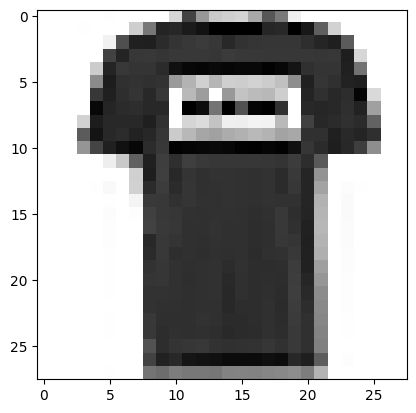

In [44]:
import matplotlib.pyplot as plt
plt.imshow(x_train_full[1]  , cmap="binary")


<Axes: >

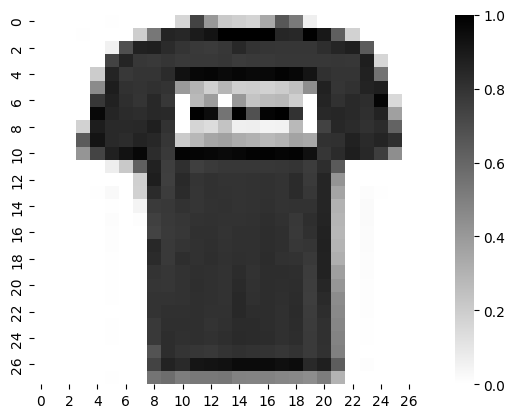

In [45]:
import seaborn as sns
sns.heatmap(x_train_full[1] , cmap="binary")


In [46]:
x_train,x_valid=x_train_full[:55000],x_train_full[55000:]
y_train,y_valid=y_train_full[:55000],y_train_full[55000:]

In [47]:
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(55000, 28, 28) (55000, 10)
(5000, 28, 28) (5000, 10)
(10000, 28, 28) (10000, 10)


In [48]:
# x_train=x_train.reshape(55000,28,28,1)
# x_valid=x_valid.reshape(5000,28,28,1)
# x_test=x_test.reshape(10000,28,28,1)


In [49]:
# y_train=y_train.reshape(55000,10,1)
# y_valid=y_valid.reshape(5000,10,1)
# y_test=y_test.reshape(10000,10,1)

In [50]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization


In [51]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),padding='same',strides=1))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding='same',strides=1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation="relu",padding='same',strides=1))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 893,002 (3.41 MB)

 Trainable params: 893,002 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [54]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping=EarlyStopping(patience=5,restore_best_weights=True)
model_checkpoint=ModelCheckpoint("model_.keras",save_best_only=True)

In [55]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid),callbacks=[early_stopping,model_checkpoint],verbose=1)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7839 - loss: 0.5784 - val_accuracy: 0.8862 - val_loss: 0.2995
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8992 - loss: 0.2739 - val_accuracy: 0.9066 - val_loss: 0.2504
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9163 - loss: 0.2240 - val_accuracy: 0.9146 - val_loss: 0.2305
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9290 - loss: 0.1892 - val_accuracy: 0.9178 - val_loss: 0.2275
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9408 - loss: 0.1609 - val_accuracy: 0.9100 - val_loss: 0.2458
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9487 - loss: 0.1333 - val_accuracy: 0.9228 - val_loss: 0.2245
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9581 - loss: 0.1107 - val_accuracy: 0.9218 - val_loss: 0.2383
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.092

In [58]:
model.predict(x_test[:3]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [59]:
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9120 - loss: 0.2702


[0.25500720739364624, 0.9135000109672546]